In [1]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns

from anndata import AnnData
from tqdm import tqdm


In [2]:
adata = sc.read_h5ad("adata/adata_nichepca_with_domain_tuned_v1.h5ad")

In [4]:
adata.obs['is_glom'] = ['Glom.' if i=='Glom.' else np.nan for i in adata.obs['nichepca_domain_tuned']]

In [12]:
adata.obs['Slide_ID']

cell_CRfb095a77d-1         0011695
cell_CRfb095a77d-2         0011695
cell_CRfb095a77d-3         0011695
cell_CRfb095a77d-5         0011695
cell_CRfb095a77d-6         0011695
                            ...   
cell_CRc71d71060-597925    0011216
cell_CRc71d71060-598041    0011216
cell_CRc71d71060-598270    0011216
cell_CRc71d71060-598508    0011216
cell_CRc71d71060-598872    0011216
Name: Slide_ID, Length: 3222037, dtype: category
Categories (8, object): ['0011216', '0011284', '0011287', '0011546', '0011695', '0011707', '0011762', '0018775']

In [27]:
all_gloms = adata[adata.obs["is_glom"] == 'Glom.']
all_gloms.obs['glom_ID'] = [row['nichepca_glom_no'] + row['Slide_ID'] + row['Patient_Sample_ID'] for i, row in all_gloms.obs.iterrows()]
all_gloms.obs

/tmp/ipykernel_98491/2997123660.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  all_gloms.obs['glom_ID'] = [row['nichepca_glom_no'] + row['Slide_ID'] + row['Patient_Sample_ID'] for i, row in all_gloms.obs.iterrows()]


,x,y,z,cluster,n_transcripts,density,elongation,area,avg_confidence,avg_assignment_confidence,...,celltype_l1_codes,celltype_l1_prob,Biopsy_ID,sample,label,nichepca_domain,nichepca_domain_tuned,nichepca_glom_no,is_glom,glom_ID
cell_CRfb095a77d-1465,2504.007072,1551.751303,31.988746,2,36,1.489,2.566,24.18,0.9967,0.7850,...,8,0.491549,0011695 - X1,X40,SLE,Glom.,Glom.,0,Glom.,00011695X40_SLE
cell_CRfb095a77d-1473,2530.357681,1529.008705,31.932661,2,110,1.974,2.139,55.72,0.9975,0.9085,...,20,1.000000,0011695 - X1,X40,SLE,Glom.,Glom.,0,Glom.,00011695X40_SLE
cell_CRfb095a77d-1482,2509.484387,1549.406793,32.318454,2,60,1.803,1.170,33.27,0.9966,0.8807,...,25,0.999137,0011695 - X1,X40,SLE,Glom.,Glom.,0,Glom.,00011695X40_SLE
cell_CRfb095a77d-1497,2502.056245,1560.918686,31.495602,2,85,1.422,2.697,59.76,0.9951,0.7113,...,25,0.997602,0011695 - X1,X40,SLE,Glom.,Glom.,0,Glom.,00011695X40_SLE
cell_CRfb095a77d-1515,2527.018834,1534.585156,33.000529,2,113,1.930,1.290,58.55,0.9974,0.8451,...,25,0.999909,0011695 - X1,X40,SLE,Glom.,Glom.,0,Glom.,00011695X40_SLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell_CRc71d71060-594172,5286.619054,9267.100173,22.943532,3,52,1.207,2.974,43.09,0.9967,0.7250,...,6,0.999801,0011216 - X9,X21,GBM,Glom.,Glom.,15,Glom.,150011216X21_GBM
cell_CRc71d71060-594658,1186.970570,8873.815019,32.418383,3,53,1.174,2.055,45.15,0.9965,0.5464,...,25,0.680551,0011216 - X7,X22,SLE,Glom.,Glom.,11,Glom.,110011216X22_SLE
cell_CRc71d71060-595416,8473.212887,6950.479947,19.003313,3,53,1.756,10.620,30.19,0.9971,0.5804,...,20,1.000000,0011216 - X9,X21,GBM,Glom.,Glom.,30,Glom.,300011216X21_GBM
cell_CRc71d71060-595616,7391.837700,9195.855568,22.866700,3,37,1.716,2.998,21.56,0.9973,0.7703,...,29,0.999998,0011216 - X9,X21,GBM,Glom.,Glom.,37,Glom.,370011216X21_GBM


In [28]:
# Drop duplicates to only keep unique glom_annot values 
unique_gloms = all_gloms.obs.drop_duplicates(subset=['glom_ID'])
unique_gloms

,x,y,z,cluster,n_transcripts,density,elongation,area,avg_confidence,avg_assignment_confidence,...,celltype_l1_codes,celltype_l1_prob,Biopsy_ID,sample,label,nichepca_domain,nichepca_domain_tuned,nichepca_glom_no,is_glom,glom_ID
cell_CRfb095a77d-1465,2504.007072,1551.751303,31.988746,2,36,1.489,2.566,24.18,0.9967,0.7850,...,8,0.491549,0011695 - X1,X40,SLE,Glom.,Glom.,0,Glom.,00011695X40_SLE
cell_CRfb095a77d-4191,2153.093128,2433.055045,31.803899,2,323,2.139,1.661,151.00,0.9966,0.9136,...,29,1.000000,0011695 - X1,X40,SLE,Glom.,Glom.,1,Glom.,10011695X40_SLE
cell_CRfb095a77d-6851,2413.265082,2659.759978,31.970817,4,79,1.275,1.411,61.96,0.9961,0.8787,...,28,1.000000,0011695 - X1,X40,SLE,Glom.,Glom.,2,Glom.,20011695X40_SLE
cell_CRfb095a77d-12488,4311.218042,1284.325572,31.368316,2,53,1.322,4.223,40.09,0.9934,0.9275,...,6,1.000000,0011695 - X2,X40,SLE,Glom.,Glom.,3,Glom.,30011695X40_SLE
cell_CRfb095a77d-27853,6953.827426,978.581344,28.500015,4,19,1.082,6.305,17.56,0.9917,0.9147,...,16,0.999917,0011695 - X3,X39,SLE,Glom.,Glom.,0,Glom.,00011695X39_SLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell_CRc71d71060-401107,6336.750964,19792.242452,18.152093,4,166,2.329,2.888,71.28,0.9979,0.9446,...,28,1.000000,0011216 - X17,X17,ANCA,Glom.,Glom.,14,Glom.,140011216X17_ANCA
cell_CRc71d71060-401768,7355.944706,18810.794226,19.132720,2,53,2.091,3.692,25.35,0.9937,0.9132,...,8,0.999724,0011216 - X18,X17,ANCA,Glom.,Glom.,15,Glom.,150011216X17_ANCA
cell_CRc71d71060-408794,7060.563309,19652.485826,18.565026,3,138,2.335,2.113,59.11,0.9972,0.8497,...,28,1.000000,0011216 - X18,X17,ANCA,Glom.,Glom.,16,Glom.,160011216X17_ANCA
cell_CRc71d71060-410059,6288.367375,20539.954058,15.669115,3,52,1.548,3.654,33.59,0.9958,0.9738,...,29,1.000000,0011216 - X17,X17,ANCA,Glom.,Glom.,17,Glom.,170011216X17_ANCA


In [29]:
unique_gloms.columns

Index(['x', 'y', 'z', 'cluster', 'n_transcripts', 'density', 'elongation',
       'area', 'avg_confidence', 'avg_assignment_confidence',
       'max_cluster_frac', 'lifespan', 'x_centroid', 'y_centroid', 'cell_area',
       'Slide_ID', 'batch', 'Patient_Sample_ID', 'Disease', 'n_genes',
       'celltype_l1', 'celltype_l1_codes', 'celltype_l1_prob', 'Biopsy_ID',
       'sample', 'label', 'nichepca_domain', 'nichepca_domain_tuned',
       'nichepca_glom_no', 'is_glom', 'glom_ID'],
      dtype='object')

In [56]:
Disease_Order = ['Cntrl', 'SLE', 'ANCA', 'GBM']
SlideID_Order = ['0011762', '0011546', '0011216', '0011707', '0011695', '0011284', '0011287', '0018775']

unique_gloms['Disease'] = [i.split('_')[1] for i in unique_gloms['Patient_Sample_ID']]
unique_gloms['Disease'] = pd.Categorical(unique_gloms['Disease'], categories=Disease_Order, ordered=True)
unique_gloms['Slide_ID'] = pd.Categorical(unique_gloms['Slide_ID'], categories=SlideID_Order, ordered=True)


/tmp/ipykernel_98491/3713899442.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_gloms['Disease'] = [i.split('_')[1] for i in unique_gloms['Patient_Sample_ID']]
/tmp/ipykernel_98491/3713899442.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_gloms['Disease'] = pd.Categorical(unique_gloms['Disease'], categories=Disease_Order, ordered=True)


### Visualize the unique gloms categorized on different variables

In [31]:
def viz_numGloms_per_variable(unique_gloms, variable, bar_width=1):
    
    #grouping by the variable of inteerest and counting the numb of rows that are in each group.reset_index returns df
    glom_counts_per_variable = unique_gloms.groupby(variable).size().reset_index(name='num_gloms')
    
    plt.style.use('default') # this is sometimes needed if rcParams.update does not work on its own
    plt.rcParams.update({'font.size': 18})  # Adjusts the default font size for all text
    
    num_items=len(glom_counts_per_variable[variable].unique())
    
    fig_width = max(10, num_items * bar_width)
    
    # Create a bar plot
    plt.figure(figsize=(fig_width, 6))
    ax = sns.barplot(x=variable, y='num_gloms', data=glom_counts_per_variable)
    plt.title('Number of Glomeruli Identified per '+variable, fontsize=20)
    plt.xlabel(variable, fontsize=20)
    plt.ylabel('Number of Glomeruli',fontsize=20)
    plt.xticks(rotation=45)  
    # Add text annotations at the top of the bars
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),  # Formats the text to 0/1/2 decimal places (as needed)
                 (p.get_x() + p.get_width() / 2., p.get_height()),  # Sets the position of the text
                 ha = 'center',   # Horizontally centers the text
                 va = 'center',   # Vertically centers the text
                 xytext = (0, 9),  # Sets the text offset. How far to the right (from bar centres) and how far above the bar is the text being placed
                 textcoords = 'offset points')  # Specifies the offset is in points
 
    plt.show()

/tmp/ipykernel_98491/205843452.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  glom_counts_per_variable = unique_gloms.groupby(variable).size().reset_index(name='num_gloms')


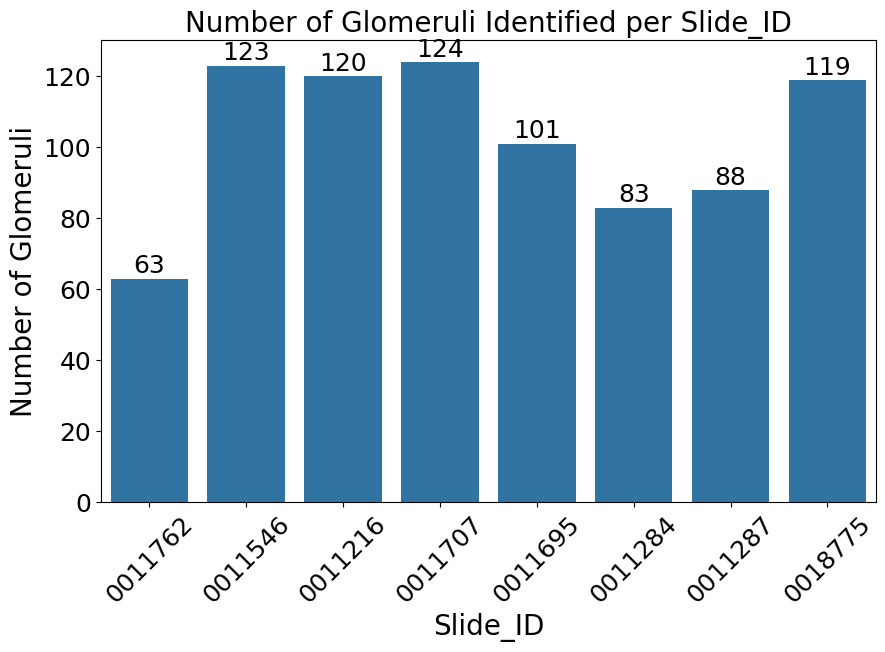

In [32]:
viz_numGloms_per_variable(unique_gloms,'Slide_ID')

/tmp/ipykernel_98491/205843452.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  glom_counts_per_variable = unique_gloms.groupby(variable).size().reset_index(name='num_gloms')


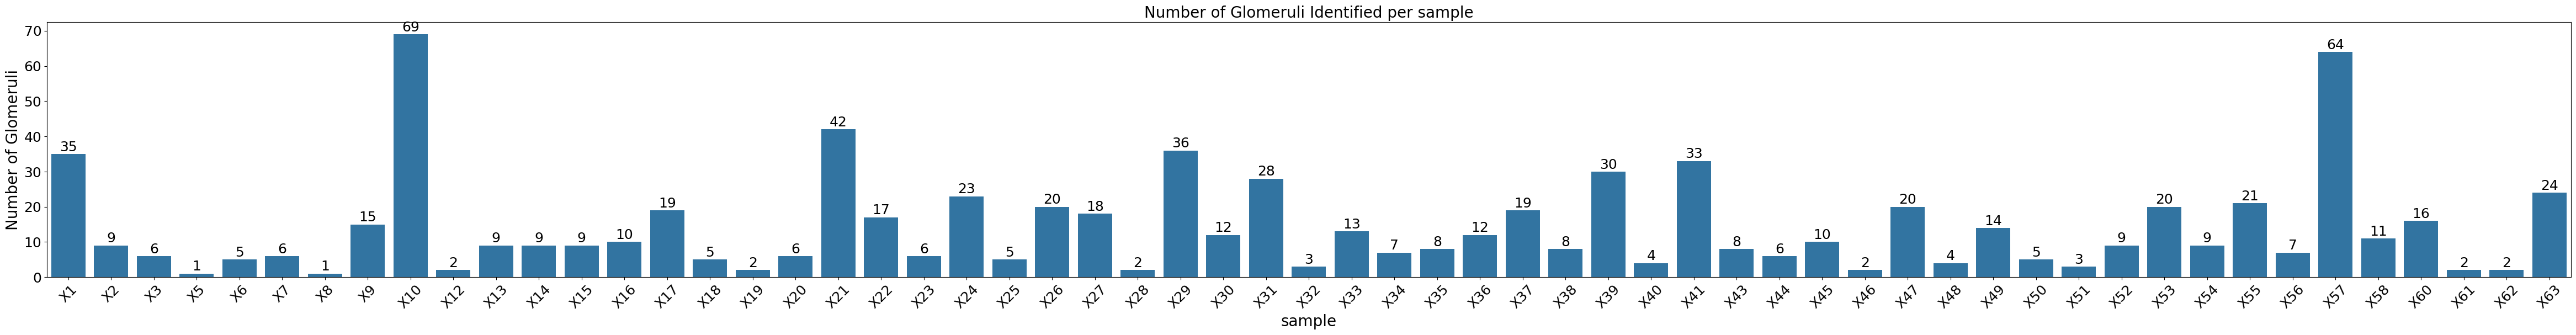

In [34]:
viz_numGloms_per_variable(unique_gloms,'sample')

/tmp/ipykernel_98491/205843452.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  glom_counts_per_variable = unique_gloms.groupby(variable).size().reset_index(name='num_gloms')


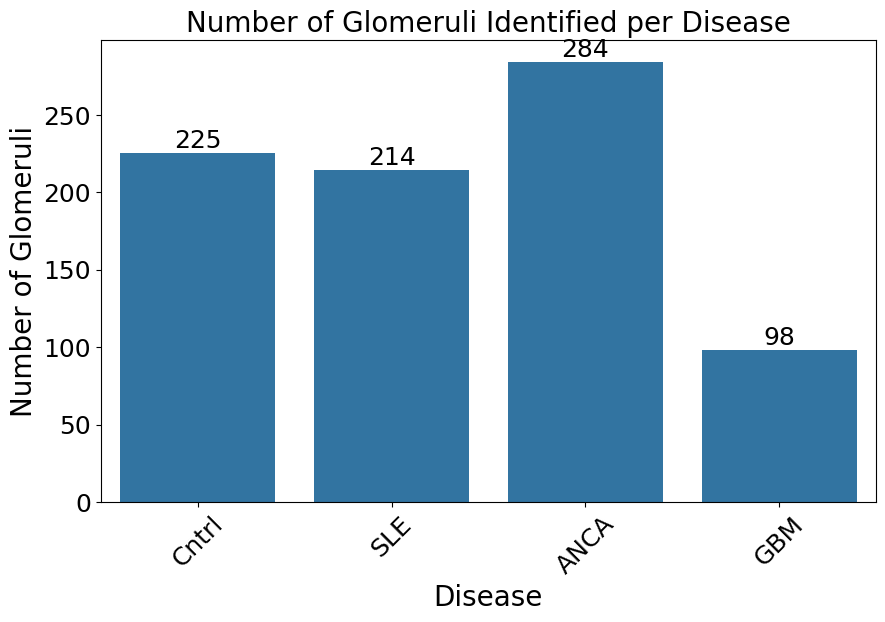

In [58]:
viz_numGloms_per_variable(unique_gloms,'Disease')

In [14]:
## Visualize based on 2 variables

In [59]:
def numGloms_by_2variables(unique_gloms, variable, variable2):
    
    # Group by slide ID and disease type, then count the unique gloms
    glom_counts_per_variable = unique_gloms.groupby([variable, variable2]).size().reset_index(name='num_gloms')
    
    # Adjust font size 
    plt.style.use('default')
    plt.rcParams.update({'font.size': 18})
    
    # Calculate the number of unique slide IDs
    num_items = len(glom_counts_per_variable[variable].unique())
    
    # Determine figure width based on the number of items
    fig_width = max(10, num_items * 5) 
    
    # Create a bar plot
    plt.figure(figsize=(fig_width, 6))
    ax = sns.barplot(x=variable, y='num_gloms', hue=variable2, data=glom_counts_per_variable)
    plt.title('Number of Glomeruli Identified per ' + variable + ' and ' + variable2, fontsize=20)
    plt.xlabel(variable, fontsize=20)
    plt.ylabel('Number of Glomeruli', fontsize=20)
    plt.xticks(rotation=45)
    
    # Add text annotations at the top of the bars
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9), textcoords='offset points')
    
    plt.show()



/tmp/ipykernel_98491/3502692452.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  glom_counts_per_variable = unique_gloms.groupby([variable, variable2]).size().reset_index(name='num_gloms')


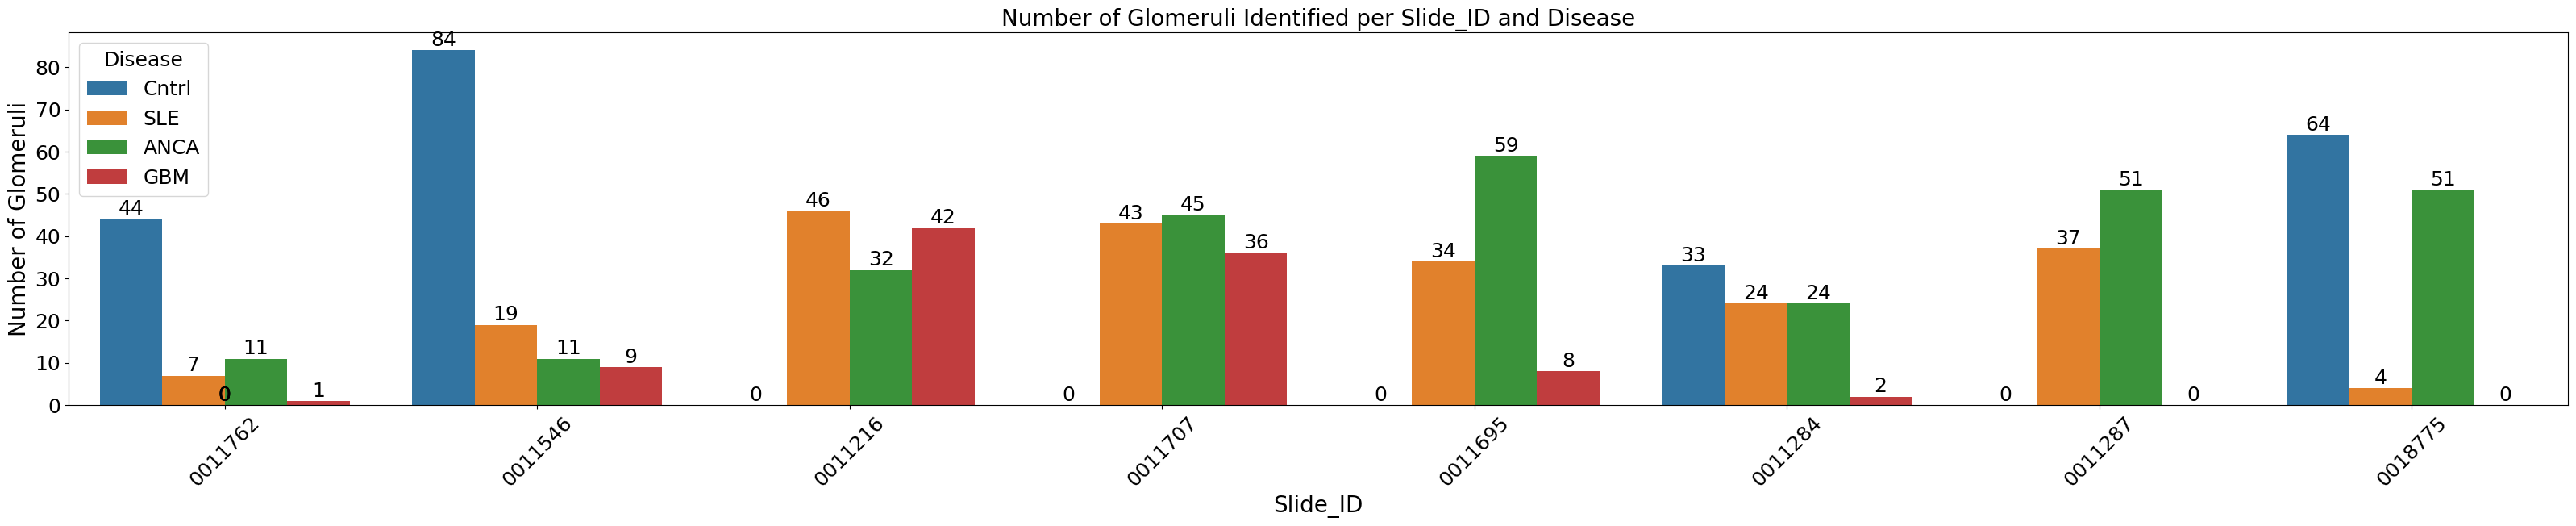

In [60]:
numGloms_by_2variables(unique_gloms, 'Slide_ID', 'Disease')
